In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('community_standards_records.csv')
df.describe()

,health_percentage
count,3686.000000
mean,58.694249
std,22.622406
min,0.000000
25%,42.000000
50%,57.000000
75%,75.000000
max,100.000000


In [28]:
filtered_df = df[df['health_percentage'] != 0]
filtered_df.describe()

filtered_df.groupby('ecosystem').describe()

health_percentage                                                  
                      count       mean        std   min    25%   50%   75%   
ecosystem                                                                    
maven                 956.0  55.133891  18.924785  12.0  40.75  50.0  75.0  \
npm                   979.0  61.106231  20.421753  25.0  42.00  57.0  75.0   
pypi                  812.0  63.546798  21.994597  25.0  42.00  62.0  87.0   
rubygems              850.0  61.430588  21.535420  12.0  42.00  57.0  87.0   

                  
             max  
ecosystem         
maven      100.0  
npm        100.0  
pypi       100.0  
rubygems   100.0

In [29]:
boolean_columns = ['readme', 'code_of_conduct', 'contributing', 'license', 'pull_request_template', 'admin_accepts_content_report', 'description']
percentage_by_ecosystem = filtered_df.groupby('ecosystem')[boolean_columns].mean() * 100
print(percentage_by_ecosystem)


               readme  code_of_conduct  contributing    license   
ecosystem                                                         
maven       98.849372        35.774059     45.606695  89.644351  \
npm        100.000000        38.304392     50.970378  97.344229   
pypi       100.000000        43.349754     56.157635  99.261084   
rubygems    99.882353        48.000000     57.411765  97.058824   

           pull_request_template  admin_accepts_content_report  description  
ecosystem                                                                    
maven                  21.548117                      4.184100    95.606695  
npm                    25.434116                      7.865169    99.182840  
pypi                   35.960591                     15.147783    95.073892  
rubygems               37.176471                      1.647059    97.647059  


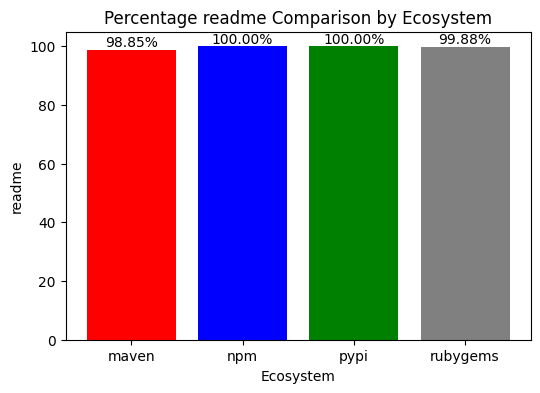

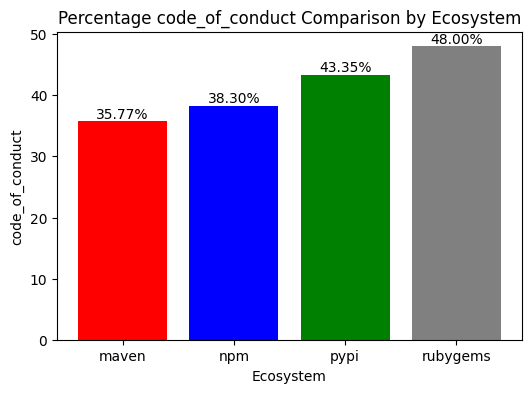

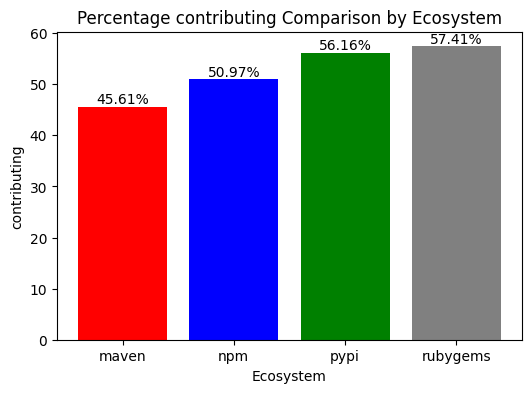

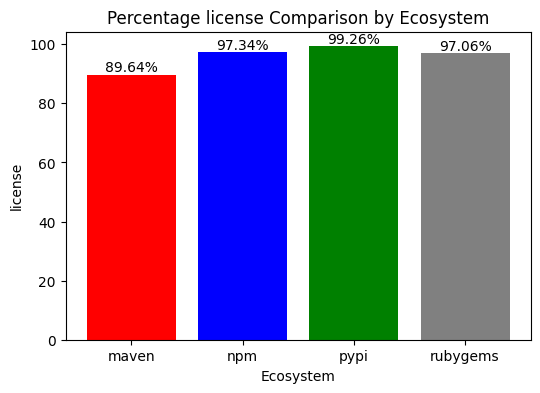

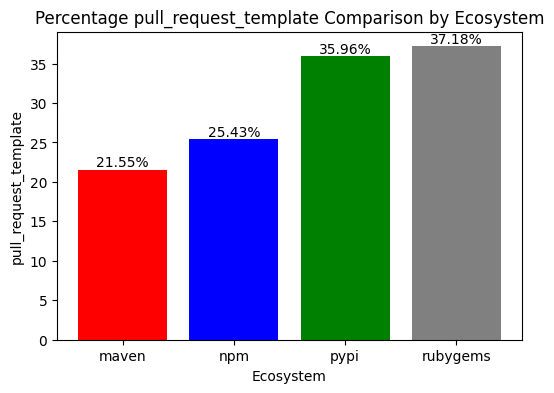

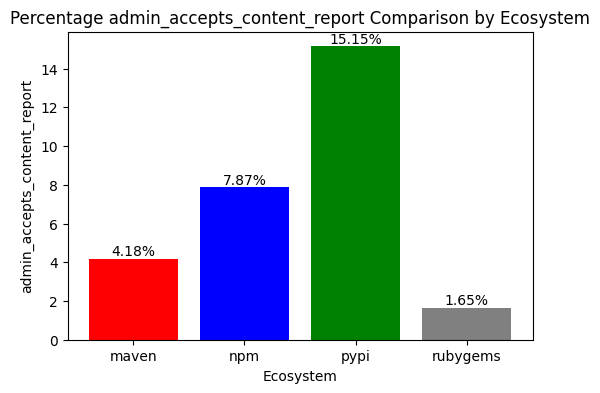

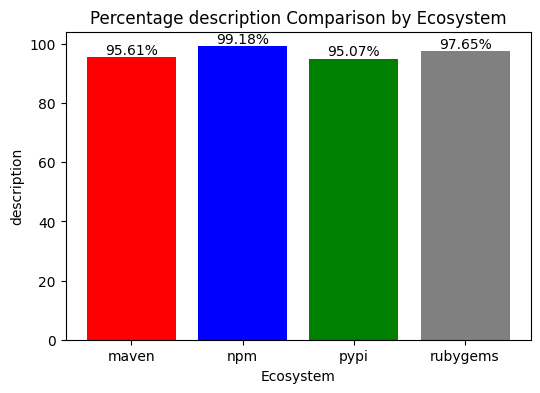

In [30]:

for metric in boolean_columns:
    plt.figure(figsize=(6, 4))  # Adjust the figsize as needed
    bars = plt.bar(percentage_by_ecosystem.index, percentage_by_ecosystem[metric], color=['red', 'blue', 'green', 'gray'])
    plt.xlabel('Ecosystem')
    plt.ylabel(metric)
    plt.title(f'Percentage {metric} Comparison by Ecosystem')
    
    # Add values inside the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

    plt.show()

<Figure size 1000x600 with 0 Axes>

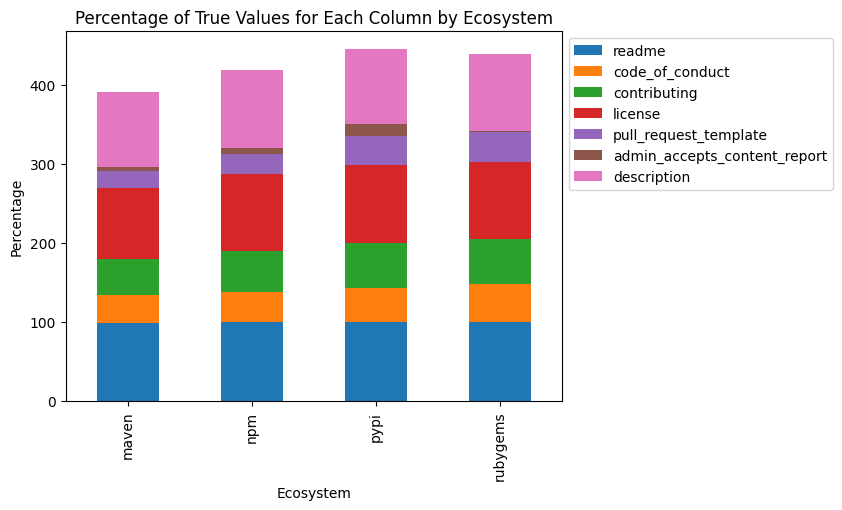

In [31]:
plt.figure(figsize=(10, 6))
percentage_by_ecosystem.plot(kind='bar', stacked=True)
plt.title('Percentage of True Values for Each Column by Ecosystem')
plt.xlabel('Ecosystem')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Health Percentage

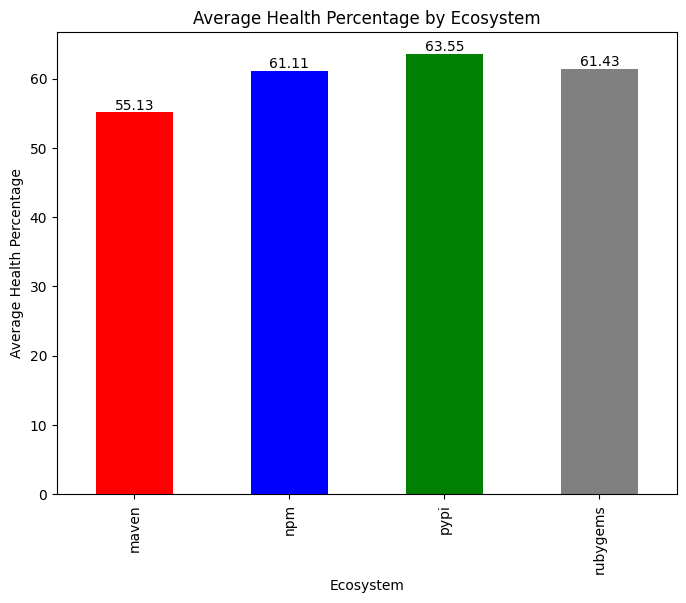

In [32]:
avg_health_percentage = filtered_df.groupby('ecosystem')['health_percentage'].mean()

plt.figure(figsize=(8, 6))
ax = avg_health_percentage.plot(kind='bar', color=['red', 'blue', 'green', 'gray'])

plt.title('Average Health Percentage by Ecosystem')
plt.xlabel('Ecosystem')
plt.ylabel('Average Health Percentage')

# Add values inside each bar
for i, v in enumerate(avg_health_percentage):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()